<a href="https://colab.research.google.com/github/ASHTONEONYANGO/Breast-Cancer-Detection/blob/master/ResNet50_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Transfer Learning by Retraining Residual Networks

- ResNet50 model

### Analysis Objective

- Retrain a Residual Network (ResNet50) model that can perform image classification on an image dataset of cats and dogs. 

### Understanding Context

The human brain by design, can easily recognize and distinguish between objects in an imsge, or images.
As an example, given the image of a cat and a dog, we can distinguish between the two within nanoseconds, and our brain perceives this difference.

If a machine could mimic this behaviour, Artificial Intelligence is as close as we can get. The field of Computer Vision aims to achjieve this, mimicking the human vision system, and there have been milestones and strides toward achieving this.

Rapid developments in Computer Vision, and by extenson - image classification, has been further accelerated by the advent of Transfer Learning. 
In this regard, Transfer Learning enables us to use a pre-existing Deep Learning model, that have beed trained on huge datasets, for our applied tasks.

One of the top pre-trained models for Image Classification, that is state of the art and is also widely used in the industry, is the **Residual Network (ResNet50)**

### **Experimental Design**

- Setting up the system
- Loading and preparing the Dataset
- Image Preprocesing
- Retraining the Model
  - ResNet50

**Data Relevance**

Images used in this project have been accessed from and are publicly available on the Kaggle platform. 

The data has been split into training and test set.
The original dataset has a training set containing 2500 images of cats and dogs, and the test set has 1000 unlabeled images. 

However for this project, a much smaller dataset has been used in order to reduce the training time.

## Setting up the system

The cats and dogs images dataset is downloaded in .zip as a zipped file.
It is extracted locally in /tmp.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-03-27 06:21:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 74.125.31.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   125MB/s    in 0.5s    

2021-03-27 06:21:44 (125 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Importing the required packages. Future imports will be made during model retraining

In [ ]:
# importing the basic libraries
import  os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
%matplotlib inline

#### **Loading and Preparing the Dataset**

In [ ]:
'''
url = 'https://www.kaggle.com/birajsth/cats-and-dogs-filtered/download'
filename = os.path.join(os.getcwd(), 'cats-and-dogs-filtered')
'''

"\nurl = 'https://www.kaggle.com/birajsth/cats-and-dogs-filtered/download'\nfilename = os.path.join(os.getcwd(), 'cats-and-dogs-filtered')\n"

In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Drawing from above, the contents of the .zip file have been extracted to the base directory /tmp/cats_and_dogs_filtered containing **train** and **validation** subdirectories for the training, validation and test sets.
they in turn all contain **cats** and **dogs**
 subdirectories.

The directories are defined as below:

In [ ]:
base = '/tmp/cats_and_dogs_filtered'
train = os.path.join(base, 'train')
validation = os.path.join(base, 'validation')

In [ ]:
# creating a directory with training cat pictures
train_cats = os.path.join(train, 'cats')

# creating a directory with training dog pictures
train_dogs = os.path.join(train, 'dogs')

# creating a directory with cat pictures for validation
validation_cats = os.path.join(validation, 'cats')

# creating a directory with dog pictures for validation
validation_dogs = os.path.join(validation, 'dogs')

### Image Preprocessing

- Exploratory analysis and preprocessing

Checking to see if the images have been loaded correctly.

In [ ]:
# configuring the matplotlib parameters
# setting up matplotlib fig, and size to fit 4x4 pictures

import matplotlib.image as mpimg

nrows = 4
ncols = 4

figure = plt.gcf()
figure.set_size_inches(ncols*4, nrows*4)
pic_index = 100

train_cats_filenames = os.listdir(train_cats)
train_dogs_filenames = os.listdir(train_dogs)

<Figure size 1152x1152 with 0 Axes>

How the filenames look like

In [ ]:
# print 5 of the filenames in the cats training dataset
print(train_cats_filenames[:5])

# printing 5 of the filenmaes in the dogs training dataset
print(train_dogs_filenames[:5])

['cat.367.jpg', 'cat.770.jpg', 'cat.380.jpg', 'cat.304.jpg', 'cat.80.jpg']
['dog.560.jpg', 'dog.820.jpg', 'dog.559.jpg', 'dog.848.jpg', 'dog.673.jpg']


Getting the total count of cat and dog images in the train and validation directories.

In [ ]:
# training images total count
print('Total training cats images:', len(os.listdir(train_cats)))
print('Total training dogs images:', len(os.listdir(train_dogs)))

# validation images total count
print('Total validation cats images:', len(os.listdir(validation_dogs)))
print('Total validation cats images:', len(os.listdir(validation_cats)))

Total training cats images: 1000
Total training dogs images: 1000
Total validation cats images: 500
Total validation cats images: 500


Drawing from above, there are 1000 images for both cats and dogs

There are also 500 images for both cats and dogs

Exploring the cats and dogs dataset

Displaying a batch of 8 cats and dogs each.

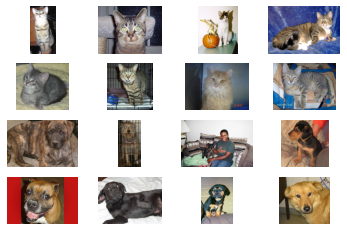

In [ ]:
next_cat_pixel = [os.path.join(train_cats, fname)
      for fname in train_cats_filenames[pic_index-8:pic_index]]

next_dog_pixel = [os.path.join(train_dogs, fname)
      for fname in train_dogs_filenames [pic_index-8:pic_index]]

# configuring the matplotlib parameters
for e, image_path in enumerate(next_cat_pixel + next_dog_pixel):
  # setting up subplots, indices starting at 1
  sp = plt.subplot(nrows, ncols, e+1)
  sp.axis('Off') # to not show axes/gridlines

  image = mpimg.imread(image_path)
  plt.imshow(image)

#plt.show(image)

### Model Building

This section involves feeding the data to a pre-trained ResNet model for retraining, through Transfer Learning

The RestNet50 is one variant of many models out of the RestNet family.

- It is preferred for its good accuracy- it has become a deepr model.
- It also tackles the Vanishing Gradient issue well.

Step 1: Data Augmentation and Generators

In [ ]:
# Adding data-augmentation parameters to the model

train_dataGen = ImageDataGenerator(rescale=1./255.,rotation_range=40, width_shift_range=.2, height_shift_range=.2, shear_range=.2, zoom_range=.2, horizontal_flip=True)

test_dataGen = ImageDataGenerator(rescale=1./255.)

train_generator = train_dataGen.flow_from_directory(train, batch_size=20, class_mode='binary', target_size=(224,224))

validation_generator = test_dataGen.flow_from_directory( validation, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Step 2: Importing the base model

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet')

94773248/94765736 [==============================] - 0s 0us/step


Only  the basic RestNet model is beign used; the layers are kept frozen, and we only modify the last layer

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

Step 3: Building and compilng the model
- The model is used just as a layer in a Sequential model, and also ading a single Fully Connected Layer on top of it.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

Compiling the model using the SGD optimizer:

In [ ]:
base_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

Step 4: Fitting the Model

In [ ]:
# fitting the model

resNet = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch=100, epochs=10 )

Epoch 1/10
 35/100 [=========>....................] - ETA: 13:36 - loss: 1.7547 - acc: 0.6607

Evaluating accuracy and Loss

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = resNet.history['acc']
val_acc = resNet.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Getting number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')